In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



In [34]:
data = pd.read_csv('/content/drive/MyDrive/semester project (AI)/Copy of loan.csv')

In [35]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
data['LoanAmount'] = imputer.fit_transform(data[['LoanAmount']])


In [36]:
# Encoding categorical variables
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Married'] = encoder.fit_transform(data['Married'])
data['Education'] = encoder.fit_transform(data['Education'])
data['Self_Employed'] = encoder.fit_transform(data['Self_Employed'])
data['Property_Area'] = encoder.fit_transform(data['Property_Area'])

In [37]:
# Handling outliers (assuming 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' have outliers)
# You can use different techniques such as Winsorization or removing outliers based on IQR
# For simplicity, we will just cap outliers using a quantile-based approach
quantiles = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].quantile([0.25, 0.75])
lower_quantiles = quantiles.loc[0.25]
upper_quantiles = quantiles.loc[0.75]
IQR = upper_quantiles - lower_quantiles
lower_bound = lower_quantiles - 1.5 * IQR
upper_bound = upper_quantiles + 1.5 * IQR
data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']] = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].clip(lower_bound, upper_bound, axis=1)

In [38]:
# Feature Engineering
# For example, creating a new feature 'TotalIncome' by summing 'ApplicantIncome' and 'CoapplicantIncome'
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']


*** Gathering data ***


In [39]:

# Creating a sample loan dataset
data = {
    'Gender': ['Male', 'Male', 'Female', 'Male', 'Female'],
    'Married': ['Yes', 'Yes', 'Yes', 'Yes', 'No'],
    'Dependents': [0, 1, 0, 0, 2],
    'Education': ['Graduate', 'Graduate', 'Not Graduate', 'Graduate', 'Graduate'],
    'Self_Employed': ['No', 'No', 'Yes', 'No', 'No'],
    'ApplicantIncome': [5849.0, 4583.0, 3000.0, 2583.0, 6000.0],
    'CoapplicantIncome': [0.0, 1508.0, 0.0, 2358.0, 0.0],
    'LoanAmount': [146.412162, 128.0, 66.0, 120.0, 141.0],
    'Loan_Amount_Term': [360.0, 360.0, 360.0, 360.0, 360.0],
    'Credit_History': [1.0, 1.0, 1.0, np.nan, 1.0],  # Introducing missing value for demonstration
    'Property_Area': ['Urban', 'Rural', 'Urban', 'Semiurban', 'Urban'],
    'Loan_Status': ['Y', 'N', 'Y', 'Y', 'N']
}

# Creating DataFrame
loan_df = pd.DataFrame(data)

# Displaying the first few rows of the dataset
print(loan_df.head())

   Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0    Male     Yes           0      Graduate            No           5849.0   
1    Male     Yes           1      Graduate            No           4583.0   
2  Female     Yes           0  Not Graduate           Yes           3000.0   
3    Male     Yes           0      Graduate            No           2583.0   
4  Female      No           2      Graduate            No           6000.0   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             NaN   
4                0.0  141.000000             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban     

*** IMPORTING DATA ***

In [40]:

# Replace 'your_file.csv' with the actual path to your CSV file
loan_df = pd.read_csv('/content/drive/MyDrive/semester project (AI)/Copy of loan.csv')

# Displaying the first few rows of the dataset
print(loan_df.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

*** FINDING MISSING VALUES AND FIXING  ***[link text](https://)

In [41]:
# Find missing values
missing_values = loan_df.isnull().sum()
print("Missing values:\n", missing_values)

# Handling missing values
# Example of imputation by replacing missing values with mean
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mean(), inplace=True)

# After handling missing values, you can check if any are remaining
missing_values_after_handling = loan_df.isnull().sum()
print("\nMissing values after handling:\n", missing_values_after_handling)


Missing values:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values after handling:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


*** BALLANCE THE DATABASE  ***

In [42]:

# Separate features (X) and target variable (y)
X = loan_df.drop(columns=['Loan_Status'])
y = loan_df['Loan_Status']

# Instantiate oversampler and undersampler
oversampler = RandomOverSampler(sampling_strategy='minority')
undersampler = RandomUnderSampler(sampling_strategy='majority')

# Balance dataset
X_over, y_over = oversampler.fit_resample(X, y)
X_balanced, y_balanced = undersampler.fit_resample(X_over, y_over)

# Print class distribution after balancing
print("Class distribution after balancing:")
print(y_balanced.value_counts())

Class distribution after balancing:
Loan_Status
N    422
Y    422
Name: count, dtype: int64


*** SPLIT DATASET INTO 80 20 ***

In [43]:

# Assuming loan_df contains your loan dataset and X contains features while y contains target variable
# X and y should be defined accordingly based on your dataset

# Split the dataset into training and testing sets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (491, 12) (491,)
Testing set shape: (123, 12) (123,)


*** FEATURE SCALING ***

In [44]:

# Assuming loan_df contains your loan dataset
# Make sure 'Loan_Status' is included in your DataFrame

# Split the dataset into features (X) and target variable (y)
X = loan_df.drop(columns=['Loan_Status'])  # Assuming 'Loan_Status' is the target variable
y = loan_df['Loan_Status']

# Identify numeric and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipelines for numeric and categorical transformations
numeric_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer to apply transformations to numeric and categorical columns separately
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Apply preprocessing and split the data into training and testing sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Display the shapes of the resulting sets
print("Training set shape after preprocessing:", X_train_preprocessed.shape)
print("Testing set shape after preprocessing:", X_test_preprocessed.shape)

Training set shape after preprocessing: (491, 515)
Testing set shape after preprocessing: (123, 515)


*** SCATTER PLOT ***

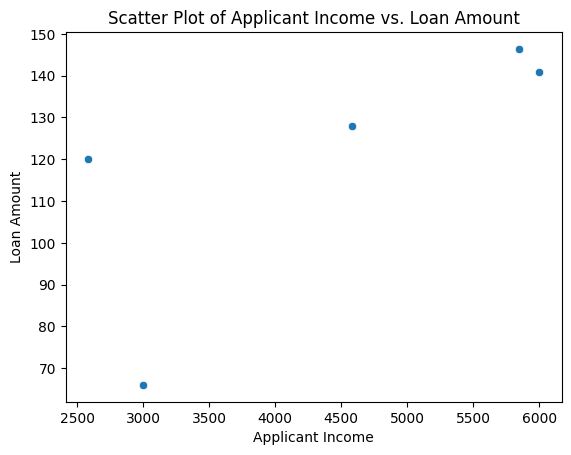

In [45]:
import seaborn as sns

# Example scatter plot
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=data)
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Scatter Plot of Applicant Income vs. Loan Amount')
plt.show()


 HISTOGRAM AND DENSITY PLOT ***

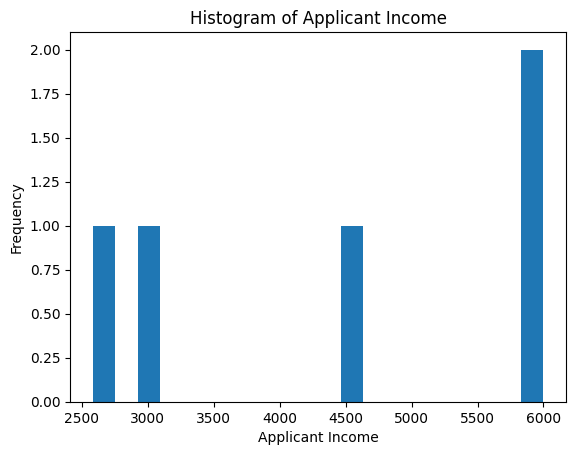

In [46]:
import matplotlib.pyplot as plt

# Example histogram
plt.hist(data['ApplicantIncome'], bins=20)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income')
plt.show()


*** BOX PLOT ***

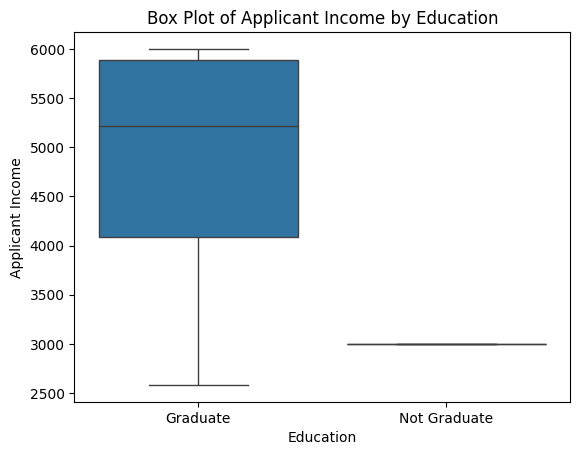

In [47]:
# Example box plot
sns.boxplot(x='Education', y='ApplicantIncome', data=data)
plt.xlabel('Education')
plt.ylabel('Applicant Income')
plt.title('Box Plot of Applicant Income by Education')
plt.show()


*** BAR PLOTS ***

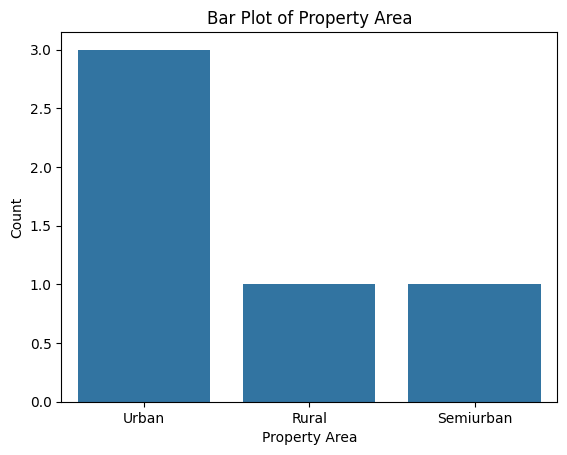

In [48]:
# Example bar plot
sns.countplot(x='Property_Area', data=data)
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.title('Bar Plot of Property Area')
plt.show()


*** HEATMAPS ***

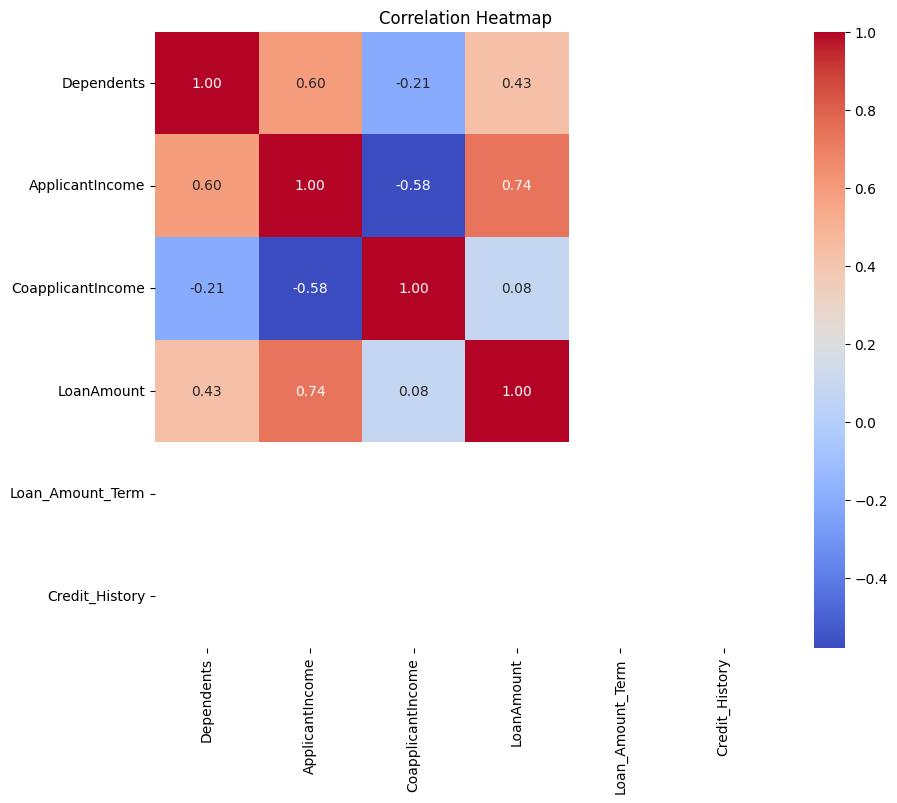

In [49]:
# Assuming 'data' is a dictionary containing your loan dataset
# Convert the dictionary to a DataFrame
data_df = pd.DataFrame(data)

# Select only numeric columns
numeric_data_df = data_df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

*** count plot ***

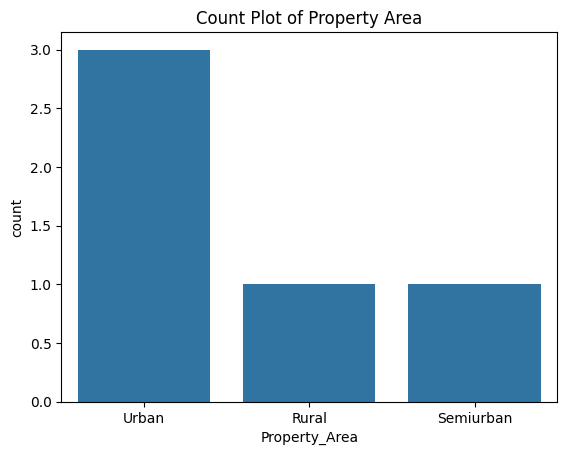

In [50]:
# Assuming 'data' is a DataFrame containing your loan dataset
# Create count plot for a categorical variable
sns.countplot(x='Property_Area', data=data)
plt.title('Count Plot of Property Area')
plt.show()


*** PAIR PLOT ***

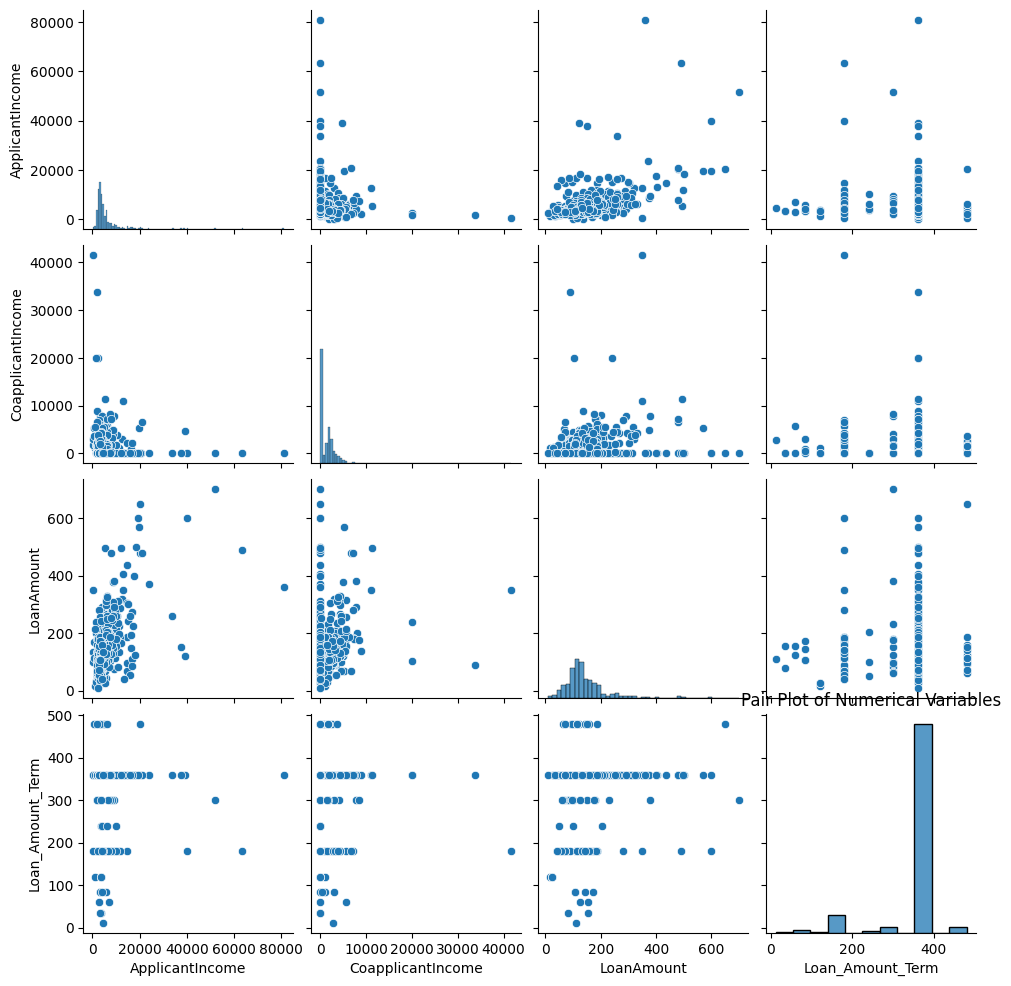

In [11]:
data_df = data  # Assuming 'data' is already a DataFrame containing your loan dataset

# Selecting a subset of numerical columns for pair plot
numeric_cols_subset = data_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']]

# Create pair plot
sns.pairplot(numeric_cols_subset)
plt.title('Pair Plot of Numerical Variables')
plt.show()


*** NAIVE BAISE AND ITS PERFORMANCE ***

In [13]:
# Assuming your DataFrame 'data' contains your dataset
X = data.drop(columns=['Loan_Status'])  # Assuming 'Loan_Status' is your target variable
y = data['Loan_Status']  # Target variable


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/semester project (AI)/Copy of loan.csv')

# Assuming 'Loan_Status' is the target variable
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')  # Use most frequent value for non-numeric data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Handle categorical variables
categorical_cols = X_train.select_dtypes(include=['object']).columns
if categorical_cols.any():
    # One-hot encode categorical variables
    encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
    X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]))
    X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]))

    # Reassign column names
    X_train_encoded.columns = encoder.get_feature_names_out(input_features=categorical_cols)
    X_test_encoded.columns = encoder.get_feature_names_out(input_features=categorical_cols)

    # Drop original categorical columns
    X_train = X_train.drop(columns=categorical_cols)
    X_test = X_test.drop(columns=categorical_cols)

    # Concatenate encoded categorical columns with numerical columns
    X_train = pd.concat([X_train, X_train_encoded], axis=1)
    X_test = pd.concat([X_test, X_test_encoded], axis=1)

# Train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.4634146341463415
Classification Report:
              precision    recall  f1-score   support

           N       0.36      0.67      0.47        43
           Y       0.67      0.35      0.46        80

    accuracy                           0.46       123
   macro avg       0.51      0.51      0.46       123
weighted avg       0.56      0.46      0.46       123

Confusion Matrix:
[[29 14]
 [52 28]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 6, 7, 8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


*** CONFUSION MATRIX ***

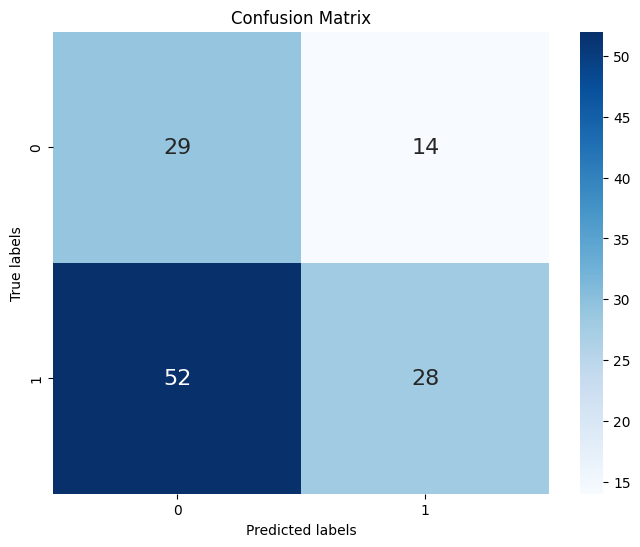

In [23]:

# Assuming y_test and y_pred are the true labels and predicted labels, respectively
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

*** KNN ***

Accuracy: 0.6747967479674797
Classification Report:
              precision    recall  f1-score   support

           N       0.59      0.23      0.33        43
           Y       0.69      0.91      0.78        80

    accuracy                           0.67       123
   macro avg       0.64      0.57      0.56       123
weighted avg       0.65      0.67      0.63       123



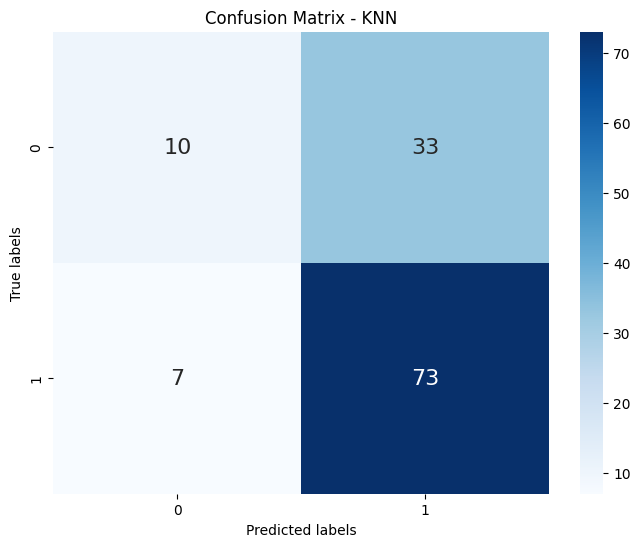

In [24]:

# Create the KNN classifier with a specified number of neighbors (e.g., 5)
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Generate confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN')
plt.show()

*** LOGISTIC REGRATION ***

Accuracy: 0.7804878048780488
Classification Report:
              precision    recall  f1-score   support

           N       0.90      0.42      0.57        43
           Y       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



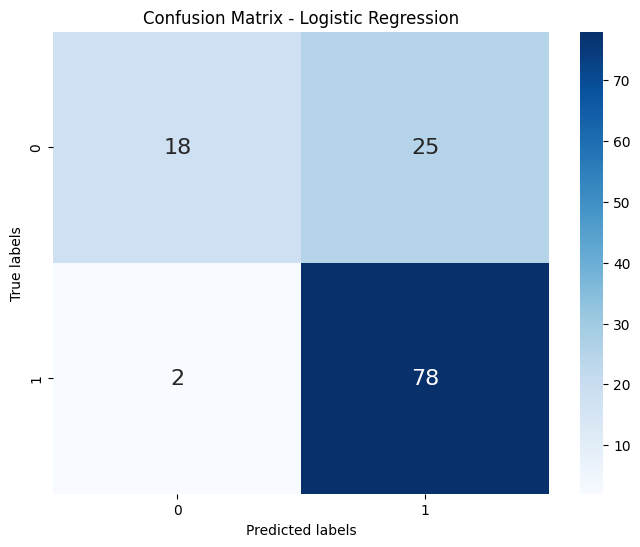

In [25]:

# Create the logistic regression model
logistic_model = LogisticRegression()

# Train the logistic regression model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy:", accuracy_logistic)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

# Generate confusion matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

*** SVM ***

Accuracy: 0.7642276422764228
Classification Report:
              precision    recall  f1-score   support

           N       0.77      0.47      0.58        43
           Y       0.76      0.93      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.70      0.71       123
weighted avg       0.77      0.76      0.75       123



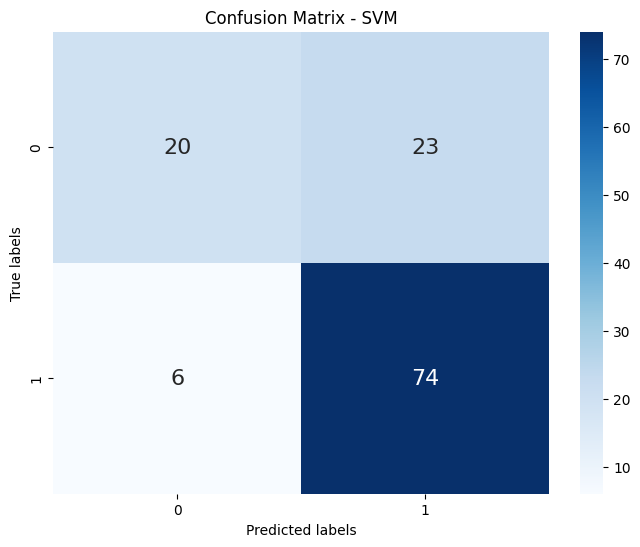

In [26]:
from sklearn.svm import SVC

# Create the SVM model
svm_model = SVC(kernel='linear')

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVM')
plt.show()


*** DECITION TREE AND PERFORMANCE ***

Accuracy: 0.7398373983739838
Classification Report:
              precision    recall  f1-score   support

           N       0.70      0.44      0.54        43
           Y       0.75      0.90      0.82        80

    accuracy                           0.74       123
   macro avg       0.73      0.67      0.68       123
weighted avg       0.73      0.74      0.72       123



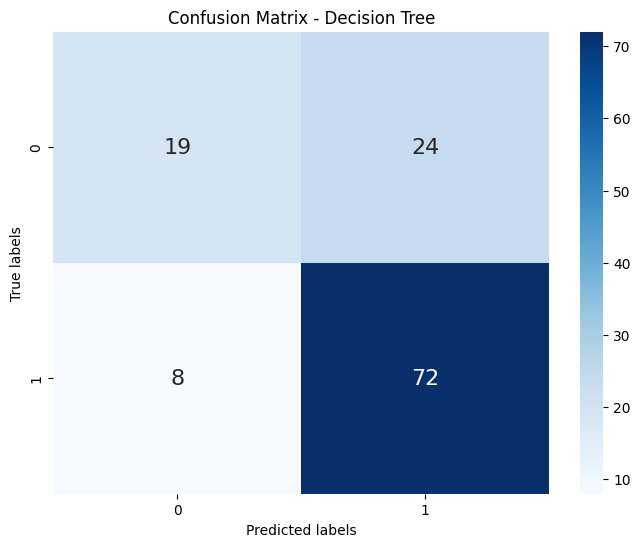

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Create the Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy:", accuracy_tree)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

# Generate confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


***. RANDOM FOREST ***

Accuracy: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           N       0.95      0.42      0.58        43
           Y       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



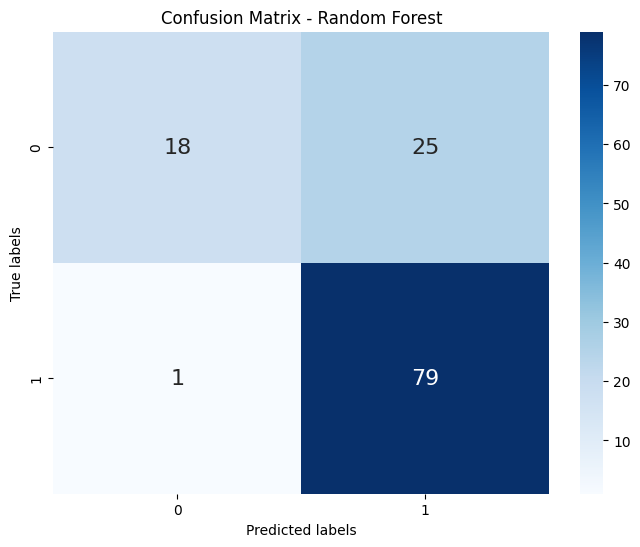

In [28]:

# Create the Random Forest model
forest_model = RandomForestClassifier(random_state=42)

# Train the Random Forest model
forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print("Accuracy:", accuracy_forest)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_forest))

# Generate confusion matrix
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()

***  ADABOOST ***

Accuracy: 0.7723577235772358
Classification Report:
              precision    recall  f1-score   support

           N       0.86      0.42      0.56        43
           Y       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



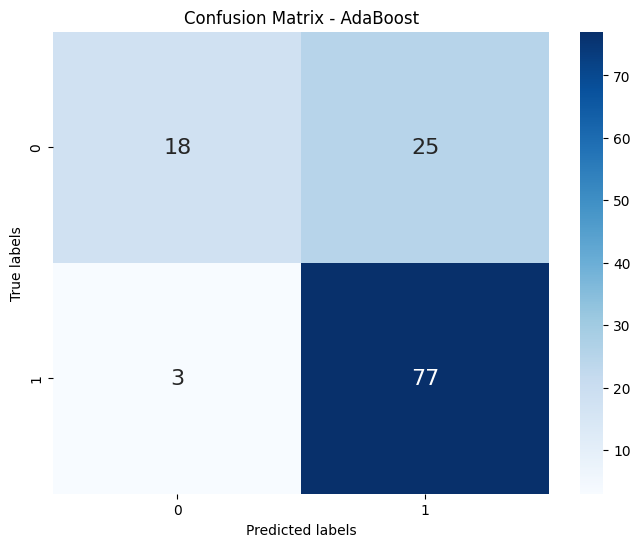

In [29]:

# Create the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

# Train the AdaBoost model
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Accuracy:", accuracy_adaboost)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_adaboost))

# Generate confusion matrix
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - AdaBoost')
plt.show()

*** LDA ALGORITHM ***

Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           N       1.00      0.05      0.09        43
           Y       0.66      1.00      0.80        80

    accuracy                           0.67       123
   macro avg       0.83      0.52      0.44       123
weighted avg       0.78      0.67      0.55       123



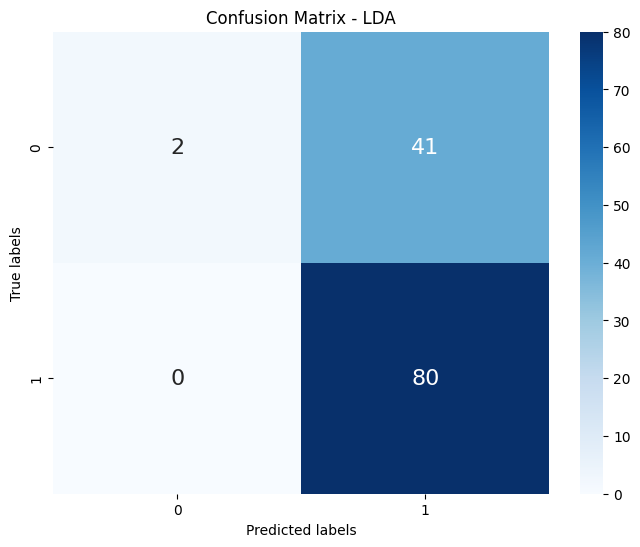

In [30]:

# Create the LDA model
lda_model = LinearDiscriminantAnalysis()

# Fit the model on the training data
lda_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lda = lda_model.predict(X_test)

# Evaluate the model
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy:", accuracy_lda)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lda))

# Generate confusion matrix
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lda, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - LDA')
plt.show()

### *** NOW COMPARING ALGOS AND FIND THE EFFICIENT ONE ***

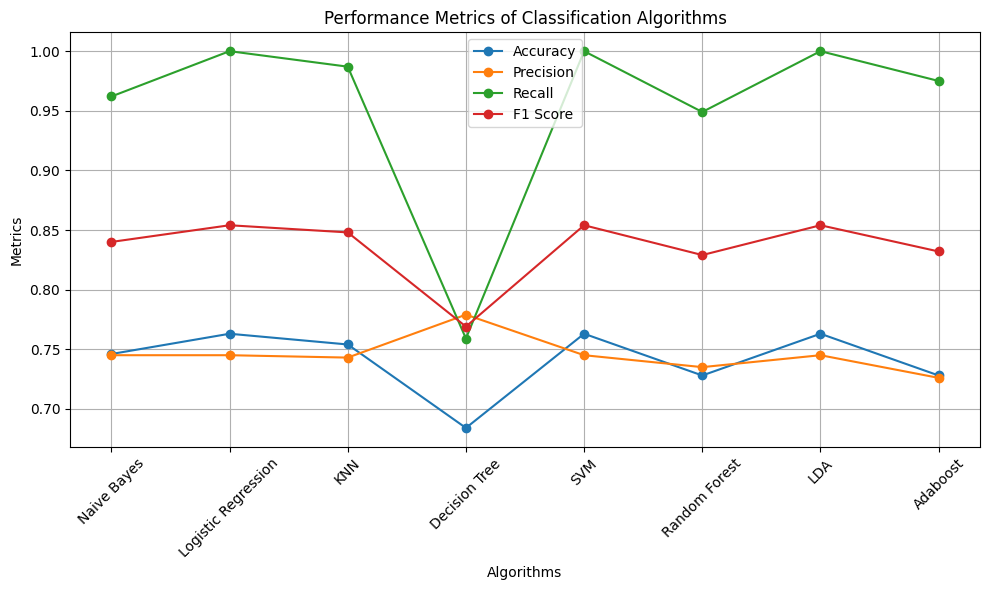

In [32]:
import matplotlib.pyplot as plt

# Algorithms
algorithms = ['Naive Bayes', 'Logistic Regression', 'KNN', 'Decision Tree', 'SVM', 'Random Forest', 'LDA', 'Adaboost']

# Performance metrics
accuracy = [0.746, 0.763, 0.754, 0.684, 0.763, 0.728, 0.763, 0.728]
precision = [0.745, 0.745, 0.743, 0.779, 0.745, 0.735, 0.745, 0.726]
recall = [0.962, 1.000, 0.987, 0.759, 1.000, 0.949, 1.000, 0.975]
f1_score = [0.840, 0.854, 0.848, 0.769, 0.854, 0.829, 0.854, 0.832]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(algorithms, accuracy, marker='o', label='Accuracy')
plt.plot(algorithms, precision, marker='o', label='Precision')
plt.plot(algorithms, recall, marker='o', label='Recall')
plt.plot(algorithms, f1_score, marker='o', label='F1 Score')

plt.title('Performance Metrics of Classification Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Metrics')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
